Trading Analytics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = 'History.csv'  # Ensure this is the correct path to your file
trades = pd.read_csv(file_path)

# Display the first few rows of the dataframe
trades.head()


,DATE/TIME,TYPE,ORDER#,BET#,REL. ORDER#,PRODUCT,VALUE DATE,STAKE,PRICE,BOUNDARY PRICE,...,SETTLEMENT PRICE,RESULT,PAYOUT,TYPE.1,EXPIRY.1,STRIKE PRICE,SETTLEMENT.1,SETTLEMENT PRICE.1,PROFIT,LOSS
0,10 Dec 2024 20:49:20,Close Bet,O2-DD-9DH47T,T2-DD-5PLJJE,O2-DD-9DH0F0,Japan 225 - Cash,-,0.5,"39,327.70",-,...,-,-,-,-,-,-,-,-,-,-
1,10 Dec 2024 20:49:20,Close Bet,O2-DD-9DH47T,T2-DD-5PLJJD,O2-DD-9DGZP7,Japan 225 - Cash,-,0.5,"39,327.70",-,...,-,-,-,-,-,-,-,-,-,-
2,10 Dec 2024 20:49:16,Close Bet,O2-DD-9DH47F,T2-DD-5PLJJ8,O2-DD-9DH1KV,GBP/JPY,-,1.5,194.008,-,...,-,-,-,-,-,-,-,-,-,-
3,10 Dec 2024 20:46:08,Close Bet,O2-DD-9DH3SM,T2-DD-5PLJE6,O2-DD-9DH1H5,Crude Oil West Texas - Cash,-,2.5,68.485,-,...,-,-,-,-,-,-,-,-,-,-
4,10 Dec 2024 20:24:27,Close Bet,O2-DD-9DH1FC,T2-DD-5PLHHD,O2-DD-9DH0YX,GBP/JPY,-,1.5,194.041,-,...,-,-,-,-,-,-,-,-,-,-


In [2]:
import pandas as pd

# Load your trading data
file_path = 'History.csv'  # Ensure this is the correct path to your file
trades = pd.read_csv(file_path)

# Define a mapping dictionary for product names
product_mapping = {
    'Japan 225 - Cash': 'NKY',
    'US 30 - Cash': 'DJI',
    'Crude Oil West Texas - Cash': 'CL',
    'US NDAQ 100 - Cash': 'NQ',
    'Gold - Cash': 'GC',
    'Crude Oil West Texas - Jan 2025': 'CL_Fut',
    'Japan 225 - Dec 2024': 'NKY_Fut',
    'Gasoline - Cash': 'RBOB',
    'US T-Note 10 YR - Cash': 'TNote_10yr',
    'AUD/USD': 'AUDUSD',
    'Heating Oil - Cash': 'HO',
    'US NDAQ 100 - Dec 2024': 'NQ_Fut',
    'EU Natural Gas (TTF) - Jan 2025': 'TTF',
    'Euro 50 - Cash': 'SX5E',
    'Germany 40 - Cash': 'DAX',
    'Copper - Cash': 'Copper',
    'Soybean - Cash': 'SOYA'
}

# Replace product names in the DataFrame
trades['PRODUCT'] = trades['PRODUCT'].replace(product_mapping)

# Define a function to check if a column should be deleted
def should_drop_column(column):
    return (column.isnull().all() or (column == '-').all())

# Identify columns to drop
columns_to_drop = [col for col in trades.columns if should_drop_column(trades[col])]

# Drop the identified columns
trades.drop(columns=columns_to_drop, inplace=True)

# Save the refined DataFrame to a new CSV file
trades.to_csv('refined_history.csv', index=False)

# Display the remaining columns for verification
print(f"Columns dropped: {columns_to_drop}")
print("Remaining columns:")
print(trades.columns)


Columns dropped: ['VALUE DATE', 'BOUNDARY PRICE', 'STOP LOSS', 'TAKE PROFIT', 'MARGIN (GBP)', 'AMOUNT EXCLUDING FEE', 'FEE', 'HOLDING COST - AMOUNT', 'HOLDING RATE', 'HOLDING COST (GBP)', 'HOLDING COST - OFFSET (GBP)', 'HOLDING COST - TOTAL (GBP)', 'PREMIUM', 'REFUND %', 'TARGET', 'WIN PAYOUT', 'DRAW PAYOUT', 'OPEN', 'EXPIRY', 'SETTLEMENT', 'SETTLEMENT PRICE', 'RESULT', 'PAYOUT', 'TYPE.1', 'EXPIRY.1', 'STRIKE PRICE', 'SETTLEMENT.1', 'SETTLEMENT PRICE.1', 'PROFIT', 'LOSS']
Remaining columns:
Index(['DATE/TIME', 'TYPE', 'ORDER#', 'BET#', 'REL. ORDER#', 'PRODUCT',
       'STAKE', 'PRICE', 'VALUE (GBP)', 'AMOUNT (GBP)', 'BALANCE (GBP)'],
      dtype='object')


In [3]:
# let's check the working directory (CWD current WD)
import os
print(os.getcwd())
# actually we specified just the filename with file_path ='History.csv'. That's the relative path isntead of absoulte path C:\\Users\\user\\Documents\\Algo Trading\\Trading Analytics
# if we need the change the CWD we type the script below
# import os
# os.chdir('C:\\Users\\user\\Documents\\Algo Trading\\Trading Analytics')



c:\Users\user\Documents\Algo Trading\Trading Analytics


In [4]:
# Check the columns and data types
print(trades.info())

# Check for missing values
print(trades.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DATE/TIME      574 non-null    object 
 1   TYPE           574 non-null    object 
 2   ORDER#         574 non-null    object 
 3   BET#           574 non-null    object 
 4   REL. ORDER#    574 non-null    object 
 5   PRODUCT        574 non-null    object 
 6   STAKE          574 non-null    float64
 7   PRICE          574 non-null    object 
 8   VALUE (GBP)    574 non-null    object 
 9   AMOUNT (GBP)   574 non-null    float64
 10  BALANCE (GBP)  574 non-null    object 
dtypes: float64(2), object(9)
memory usage: 49.5+ KB
None
DATE/TIME        0
TYPE             0
ORDER#           0
BET#             0
REL. ORDER#      0
PRODUCT          0
STAKE            0
PRICE            0
VALUE (GBP)      0
AMOUNT (GBP)     0
BALANCE (GBP)    0
dtype: int64


In [5]:
# Total number of trades
total_trades = len(trades)
print(f'Total Number of Trades: {total_trades}')


Total Number of Trades: 574


In [6]:
# Calculate win rate
wins = trades[trades['AMOUNT (GBP)'] > 0]  # Replace 'Profit' with your actual profit/loss column name
win_rate = len(wins) / total_trades * 100
print(f'Win Rate: {win_rate:.2f}%')


Win Rate: 46.17%


In [7]:
# Rename the 'AMOUNT (GBP)' column to 'PL'
trades.rename(columns={'AMOUNT (GBP)': 'PL'}, inplace=True)


In [8]:
print(trades.columns)

Index(['DATE/TIME', 'TYPE', 'ORDER#', 'BET#', 'REL. ORDER#', 'PRODUCT',
       'STAKE', 'PRICE', 'VALUE (GBP)', 'PL', 'BALANCE (GBP)'],
      dtype='object')


In [9]:
trades.head()

,DATE/TIME,TYPE,ORDER#,BET#,REL. ORDER#,PRODUCT,STAKE,PRICE,VALUE (GBP),PL,BALANCE (GBP)
0,10 Dec 2024 20:49:20,Close Bet,O2-DD-9DH47T,T2-DD-5PLJJE,O2-DD-9DH0F0,NKY,0.5,"39,327.70","19,663.85",12.71,"99,295.13"
1,10 Dec 2024 20:49:20,Close Bet,O2-DD-9DH47T,T2-DD-5PLJJD,O2-DD-9DGZP7,NKY,0.5,"39,327.70","19,663.85",21.45,"99,282.42"
2,10 Dec 2024 20:49:16,Close Bet,O2-DD-9DH47F,T2-DD-5PLJJ8,O2-DD-9DH1KV,GBP/JPY,1.5,194.008,"29,101.20",-4.80,"99,260.97"
3,10 Dec 2024 20:46:08,Close Bet,O2-DD-9DH3SM,T2-DD-5PLJE6,O2-DD-9DH1H5,CL,2.5,68.485,"17,121.25",-2.50,"99,265.77"
4,10 Dec 2024 20:24:27,Close Bet,O2-DD-9DH1FC,T2-DD-5PLHHD,O2-DD-9DH0YX,GBP/JPY,1.5,194.041,"29,106.15",-6.45,"99,268.27"


In [10]:
trades.describe()

,STAKE,PL
count,574.000000,574.000000
mean,1.290592,-1.205244
std,2.228018,54.534950
min,0.100000,-516.000000
25%,0.300000,-9.735000
50%,0.500000,-0.645000
75%,1.500000,7.165000
max,20.000000,581.600000


In [11]:
# This will ignore any errors for columns that don't exist
trades.drop(columns=['VALUE DATE','BOUNDARY PRICE', 'STOP LOSS',
       'TAKE PROFIT', 'MARGIN (GBP)'], 
               inplace=True, errors='ignore')

We have cleaned the history file and name the new file as "refined_history.csv". It's the file we are working with. Let's progress!

In [12]:
total_trades = len(trades)
wins = trades[trades['PL'] > 0]
win_rate = len(wins) / total_trades * 100
print(f'Win Rate: {win_rate:.2f}%')


Win Rate: 46.17%


EDA

Distribution of P&L

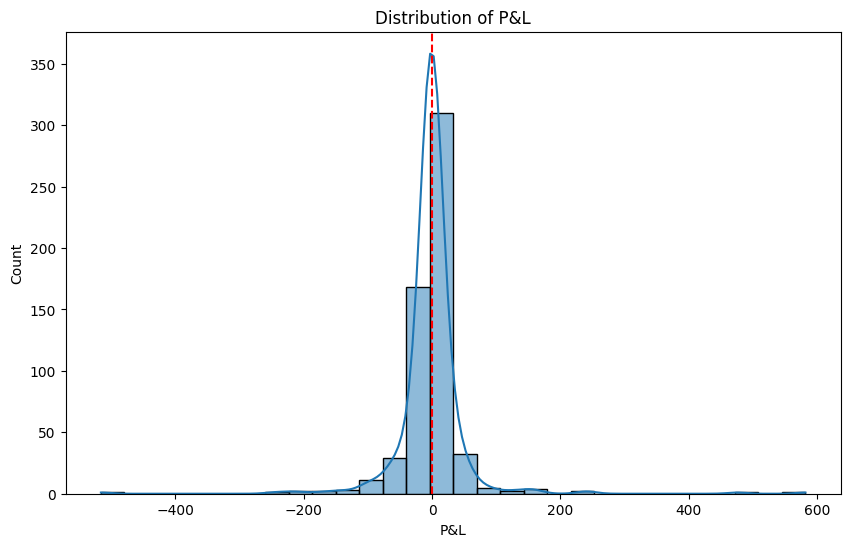

In [13]:
#Visualize the distribution of P&L values.
plt.figure(figsize=(10, 6))
sns.histplot(trades['PL'], bins=30, kde=True)
plt.title('Distribution of P&L')
plt.xlabel('P&L')
plt.axvline(0, color='red', linestyle='--') # Highlight break-even point<br>plt.show()



Cumulative Profit Curve

Win Rate Visualization

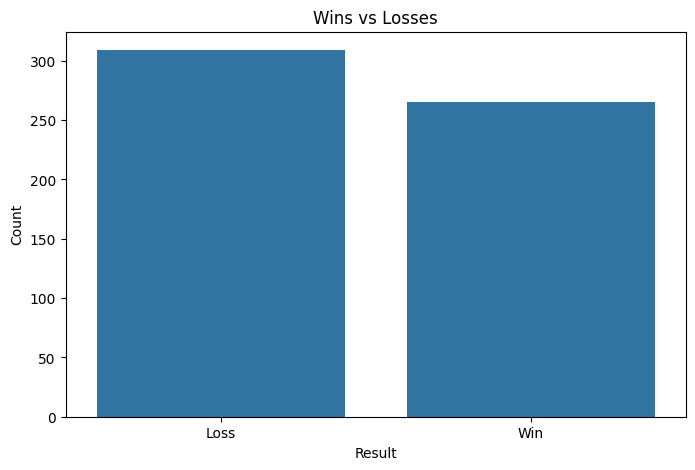

In [14]:
# Visualize the number of wins and losses
win_counts = trades['PL'].apply(lambda x: 'Win' if x > 0 else 'Loss').value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=win_counts.index, y=win_counts.values)
plt.title('Wins vs Losses')
plt.xlabel('Result')
plt.ylabel('Count')
plt.show()

Average P&L per Trade

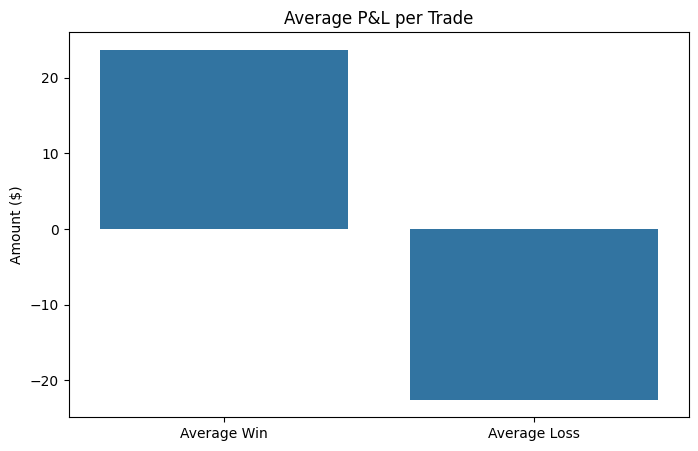

In [15]:
# Show average P&L for wins and losses
avg_win = trades[trades['PL'] > 0]['PL'].mean()
avg_loss = trades[trades['PL'] <= 0]['PL'].mean()
plt.figure(figsize=(8, 5))
sns.barplot(x=['Average Win', 'Average Loss'], y=[avg_win, avg_loss])
plt.title('Average P&L per Trade')
plt.ylabel('Amount ($)')
plt.show()

In [16]:
# Calculate and print average win and loss
avg_win = trades[trades['PL'] > 0]['PL'].mean()
avg_loss = trades[trades['PL'] <= 0]['PL'].mean()

# Display the results
print(f'Average win per trade: ${avg_win:.2f}')
print(f'Average loss per trade: ${avg_loss:.2f}')


Average win per trade: $23.70
Average loss per trade: $-22.57


To improve the appearance of your Cumulative Profit Curve and make it more readable, you can take the following steps:

Ensure Dates are Sorted: Make sure your DataFrame is sorted by date, so the cumulative profit is plotted in the correct order.

Format the X-axis: Use date formatting to reduce clutter, showing only a few key dates instead of every date.

Reduce Gridlines: You can adjust the gridlines to make the graph less cluttered.

Step 1: Sort the DataFrame by Date
Make sure your DataFrame is sorted by the date column. Assuming your date column is named 'DATE/TIME', you can do this:

In [17]:
# Convert 'DATE/TIME' to datetime format if it’s not already
trades['DATE/TIME'] = pd.to_datetime(trades['DATE/TIME'])

# Sort the DataFrame by date
trades.sort_values(by='DATE/TIME', inplace=True)

Step 2: Plot the Cumulative Profit Curve
Now, modify the plotting code to enhance readability:

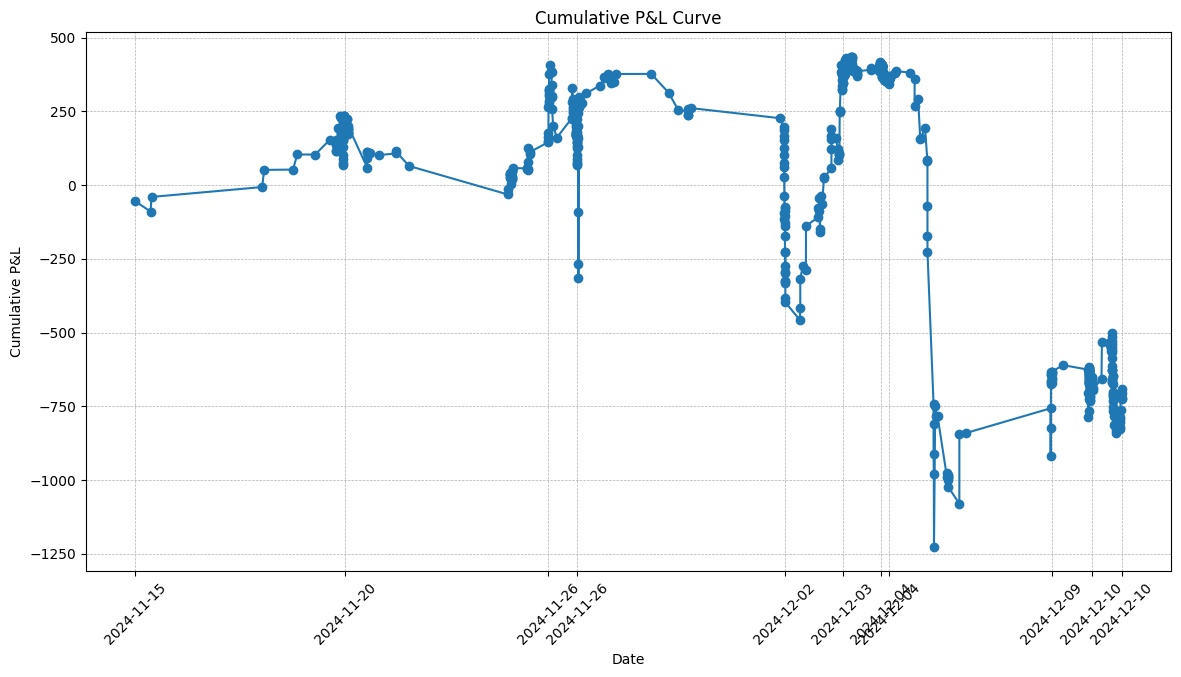

In [18]:
# Calculate Cumulative PL
trades['Cumulative PL'] = trades['PL'].cumsum()

plt.figure(figsize=(14, 7))
plt.plot(trades['DATE/TIME'], trades['Cumulative PL'], marker='o', linestyle='-')
plt.title('Cumulative P&L Curve')
plt.xlabel('Date')
plt.ylabel('Cumulative P&L')

# Set x-axis format to show fewer ticks
plt.xticks(ticks=trades['DATE/TIME'][::len(trades)//10], rotation=45)  # Show every 10th date for clarity

# Adjust gridlines
plt.grid(visible=True, linestyle='--', linewidth=0.5)  # Change line style and width
plt.show()


# EDGE ANALYSIS

In [19]:
# Calculate total trades
total_trades = len(trades)

# Calculate win and loss counts
wins = trades[trades['PL'] > 0]
losses = trades[trades['PL'] <= 0]

# Calculate win rate and loss rate
win_rate = len(wins) / total_trades
loss_rate = len(losses) / total_trades

# Calculate average win and average loss
average_win = wins['PL'].mean() if not wins.empty else 0
average_loss = losses['PL'].mean() if not losses.empty else 0

# Calculate expectancy
expectancy = (win_rate * average_win) + (loss_rate * average_loss)

# Display the results
print(f'Win Rate: {win_rate:.2f}')
print(f'Loss Rate: {loss_rate:.2f}')
print(f'Average Win: ${average_win:.2f}')
print(f'Average Loss: ${average_loss:.2f}')
print(f'Expectancy: ${expectancy:.2f}')


Win Rate: 0.46
Loss Rate: 0.54
Average Win: $23.70
Average Loss: $-22.57
Expectancy: $-1.21


In [20]:
# Calculate total trades
total_trades = len(trades)

# Calculate win and loss counts
wins = trades[trades['PL'] > 0]
losses = trades[trades['PL'] <= 0]

# Calculate win rate and loss rate
win_rate = len(wins) / total_trades
loss_rate = len(losses) / total_trades

# Calculate average win and average loss
average_win = wins['PL'].mean() if not wins.empty else 0
average_loss = losses['PL'].mean() if not losses.empty else 0

# Calculate expectancy
expectancy = (win_rate * average_win) + (loss_rate * average_loss)

# Calculate risk-to-reward ratio
risk_to_reward_ratio = abs(average_loss / average_win) if average_win != 0 else None

# Display the results
print(f'Win Rate: {win_rate:.2f}')
print(f'Loss Rate: {loss_rate:.2f}')
print(f'Average Win: ${average_win:.2f}')
print(f'Average Loss: ${average_loss:.2f}')
print(f'Expectancy: ${expectancy:.2f}')
print(f'Risk-to-Reward Ratio: {risk_to_reward_ratio:.2f}' if risk_to_reward_ratio is not None else 'Risk-to-Reward Ratio: Undefined (Average Win is zero)')


Win Rate: 0.46
Loss Rate: 0.54
Average Win: $23.70
Average Loss: $-22.57
Expectancy: $-1.21
Risk-to-Reward Ratio: 0.95


# Update github

Navigate to Your Project Directory: Make sure you are in the correct directory where your Git repository is located (e.g., C:\Users\user\Documents\Algo Trading\Trading Analytics). Use the cd command to change directories:

cd "C:\Users\user\Documents\Algo Trading\Trading Analytics"

Check Git Status Again: After changing to the correct directory, run:

git status

You should see the status of your Git repository, including any changes you've made.

Stage Your Changes: If you see the modified files that you want to commit, stage them using:

git add .

Commit Your Changes: After staging, commit your changes:

git commit -m "overall stats and edge"

1/ can i do a new commit before git push. 2/ or can i delete the previous commit or change it 3/ if yes do i have to do git add again 4/ what's best practice if i make a mistake with git commit (do new git commit , delete previous, or it does mkatter as long as i have not done git push)
Great questions! Let’s go through each of your queries step-by-step:

1. Can I do a new commit before git push?
Yes, you can create a new commit at any time before you push to the remote repository. Each commit is independent, and you can have multiple commits waiting to be pushed.

2. Can I delete the previous commit or change it?
Yes, you can modify the last commit using the following methods:

Amend the Last Commit: If you want to change the last commit (e.g., to modify the commit message or add changes), you can use:

git commit --amend

This will allow you to modify the last commit. You may need to stage any new changes with git add before using this command.

Delete the Last Commit: If you want to remove the last commit entirely and reset your branch to the previous state, you can use:

git reset --soft HEAD~1

This will keep your changes in the working directory (unstaged), allowing you to recommit them if needed.

If you prefer to discard the changes along with the commit:

git reset --hard HEAD~1

3. If yes, do I have to do git add again?
If you use git commit --amend, you should stage any new changes with git add before amending.
If you use git reset --soft HEAD~1, your changes remain in the working directory, so you can modify and stage them again as needed.
If you use git reset --hard HEAD~1, your changes will be lost, and you would not need to do git add again since there would be no changes.
4. What's best practice if I make a mistake with git commit?
The best practice depends on the situation:

If you need to change the last commit: Use git commit --amend if it's a minor change (like fixing a typo in the commit message or adding a small change).

If you want to start over with the last commit: Use git reset --soft HEAD~1 to keep your changes for further editing or git reset --hard HEAD~1 if you want to discard everything and start fresh.

If everything is correct: If you haven’t pushed yet and everything looks good, simply continue working as planned. You can always make new commits as needed.

# Edge per product

In [21]:
import pandas as pd

# Load your trading data (assuming it's already done)
# trades = pd.read_csv('refined_history.csv')

# Get unique products from the 'PRODUCT' column
unique_products = trades['PRODUCT'].unique().tolist()

# Display the unique products
print(f"PRODUCTS = {unique_products}")


PRODUCTS = ['CL', 'USD/JPY', 'DJI', 'GC', 'AUDUSD', 'USD/CAD', 'CL_Fut', 'GBP/JPY', 'NKY', 'NQ', 'TNote_10yr', 'HO', 'RBOB', 'GBP/USD', 'DAX', 'NKY_Fut', 'TTF', 'USD/CHF', 'NQ_Fut', 'SOYA', 'SX5E', 'Copper']


In [22]:
filtered_trades = trades[trades['PRODUCT'].isin(unique_products)]


In [23]:
# Count the number of unique products
num_unique_products = trades['PRODUCT'].nunique()

# Display the result
print(f'Number of unique products: {num_unique_products}')




Number of unique products: 22


In [24]:
results = []

# Calculate the overall total trades across all products
overall_total_trades = len(trades)

for product in unique_products:
    product_data = trades[trades['PRODUCT'] == product]
    total_trades = len(product_data)  # Total trades (wins + losses)
    
    wins = product_data[product_data['PL'] > 0]
    losses = product_data[product_data['PL'] <= 0]

    win_count = len(wins)
    loss_count = len(losses)

    average_win = wins['PL'].mean() if not wins.empty else 0
    average_loss = losses['PL'].mean() if not losses.empty else 0

    win_rate = (win_count / total_trades) * 100 if total_trades > 0 else 0
    edge = (win_count / total_trades * average_win) + (loss_count / total_trades * average_loss) if total_trades > 0 else 0

    # Calculate percentage of total trades for this product and round it to 2 decimal places
    percentage_of_total_trades = round((total_trades / overall_total_trades) * 100, 2) if overall_total_trades > 0 else 0

    # Calculate RRR (Average Win / Average Loss)
    rrr = average_win / abs(average_loss) if average_loss != 0 else None

    # Append results to the DataFrame including Total Trades, Percentage, and RRR
    results.append({
        'Product': product,
        'Total Trades': total_trades,  # Total number of trades for this product
        '% of Total Trades': percentage_of_total_trades,  # New column for percentage rounded
        'Wins': win_count,
        'Average Win': average_win,
        'Losses': loss_count,
        'Average Loss': average_loss,
        'Edge': edge,
        '% Win': win_rate,
        'RRR': rrr,  # New column for Risk-to-Reward Ratio
    })

summary_df = pd.DataFrame(results)
print(summary_df)


       Product  Total Trades  % of Total Trades  Wins  Average Win  Losses  \
0           CL            80              13.94    37    26.325946      43   
1      USD/JPY            15               2.61     7    18.671429       8   
2          DJI           105              18.29    47    26.925957      58   
3           GC            43               7.49    22    14.714545      21   
4       AUDUSD             3               0.52     2    17.495000       1   
5      USD/CAD             9               1.57     2    14.000000       7   
6       CL_Fut            18               3.14    10    12.765000       8   
7      GBP/JPY            30               5.23    16    21.398125      14   
8          NKY           158              27.53    70    33.418857      88   
9           NQ            67              11.67    34    15.506765      33   
10  TNote_10yr             4               0.70     3     1.326667       1   
11          HO             2               0.35     1     2.7000

In [25]:
# Calculate percentage of total trades for this product
percentage_of_total_trades = round((total_trades / overall_total_trades) * 100, 2) if overall_total_trades > 0 else 0

# Append results to the DataFrame including Total Trades and Percentage
results.append({
    'Product': product,
    'Total Trades': total_trades,
    '% of Total Trades': percentage_of_total_trades,  # New column for percentage rounded
    'Wins': win_count,
    'Average Win': average_win,
    'Losses': loss_count,
    'Average Loss': average_loss,
    'Edge': edge,
    '% Win': win_rate,
})


In [26]:
import pandas as pd

# Assuming summary_df is already created and contains your edge data

# Specify the path to your refined_history file
refined_history_path = 'refined_history.xlsx'  # Update with the actual path if necessary

# Create an Excel writer object (this will create a new file if it doesn't exist)
with pd.ExcelWriter(refined_history_path, engine='openpyxl') as writer:
    # Write the summary_df to a new sheet named 'edges'
    summary_df.to_excel(writer, sheet_name='edges', index=False)

print("Data saved to 'refined_history.xlsx' in the 'edges' sheet.")



Data saved to 'refined_history.xlsx' in the 'edges' sheet.


In [27]:
refined_history_path = r'C:\Users\user\Documents\Algo Trading\refined_history.xlsx'


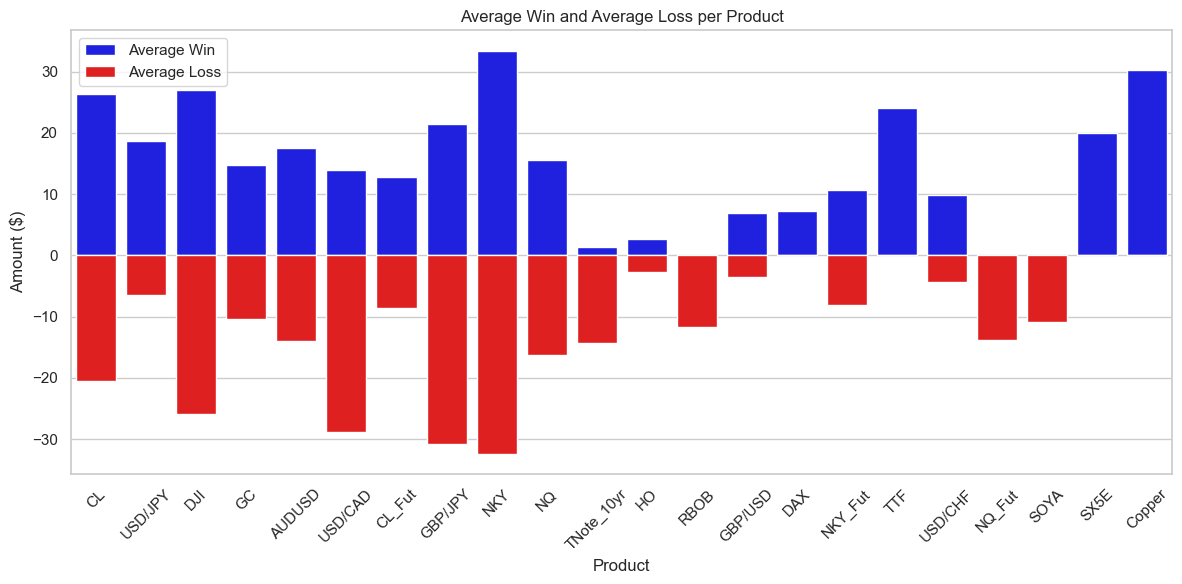

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Plot Average Win vs Average Loss
plt.figure(figsize=(12, 6))
sns.barplot(x='Product', y='Average Win', data=summary_df, color='blue', label='Average Win')
sns.barplot(x='Product', y='Average Loss', data=summary_df, color='red', label='Average Loss')

plt.title('Average Win and Average Loss per Product')
plt.xlabel('Product')
plt.ylabel('Amount ($)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_14268\2318123739.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(summary_df['Product'], rotation=45)


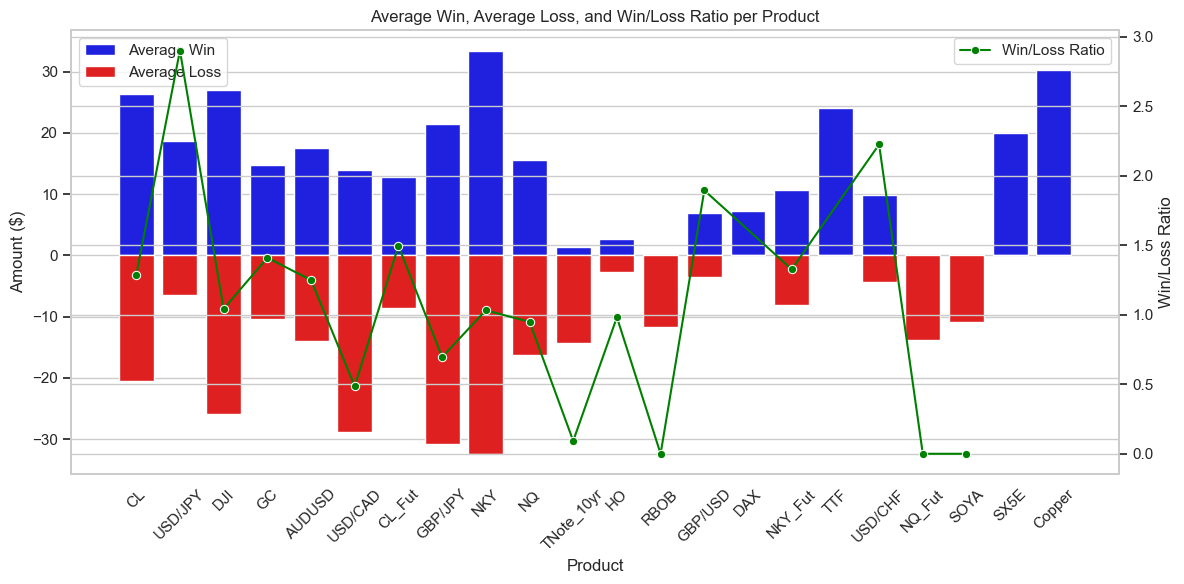

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the ratio of Average Win to Average Loss
summary_df['Win/Loss Ratio'] = summary_df['Average Win'] / abs(summary_df['Average Loss'])

# Set the style for seaborn
sns.set(style="whitegrid")

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for Average Win and Average Loss
sns.barplot(x='Product', y='Average Win', data=summary_df, color='blue', ax=ax1, label='Average Win')
sns.barplot(x='Product', y='Average Loss', data=summary_df, color='red', ax=ax1, label='Average Loss')

# Set the labels and title
ax1.set_title('Average Win, Average Loss, and Win/Loss Ratio per Product')
ax1.set_xlabel('Product')
ax1.set_ylabel('Amount ($)')
ax1.set_xticklabels(summary_df['Product'], rotation=45)
ax1.legend(loc='upper left')

# Create a secondary axis for the Win/Loss Ratio
ax2 = ax1.twinx()
sns.lineplot(x='Product', y='Win/Loss Ratio', data=summary_df, color='green', marker='o', ax=ax2, label='Win/Loss Ratio')

# Set the secondary axis label
ax2.set_ylabel('Win/Loss Ratio')

# Show the legend for the secondary axis
ax2.legend(loc='upper right')

# Adjust layout
plt.tight_layout()
plt.show()


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


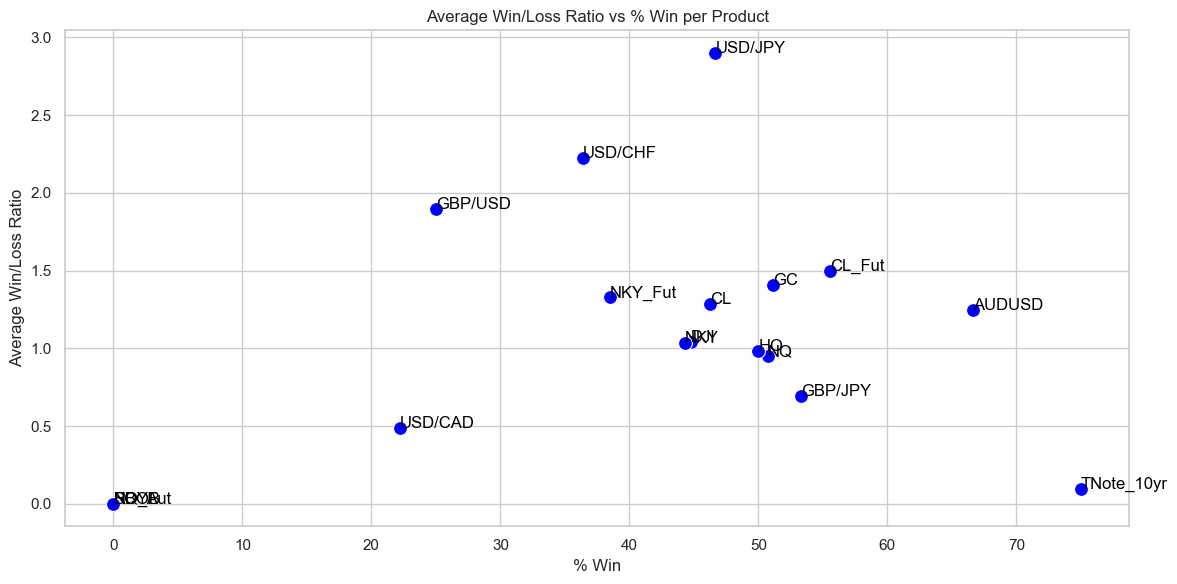

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have the summary_df DataFrame with the necessary columns

# Calculate average win/average loss ratio
summary_df['Average Win/Loss Ratio'] = summary_df['Average Win'] / abs(summary_df['Average Loss'])

# Set the style for seaborn
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='% Win', y='Average Win/Loss Ratio', data=summary_df, color='blue', s=100)

# Set titles and labels
plt.title('Average Win/Loss Ratio vs % Win per Product')
plt.xlabel('% Win')
plt.ylabel('Average Win/Loss Ratio')

# Annotate each point with the product name
for i in range(len(summary_df)):
    plt.text(summary_df['% Win'][i], summary_df['Average Win/Loss Ratio'][i], 
             summary_df['Product'][i], horizontalalignment='left', size='medium', color='black')

# Show gridlines for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()



# Bubble chart
A variation of the scatter plot where a third variable is represented by the size of the bubbles. You could use the total trades as the bubble size.

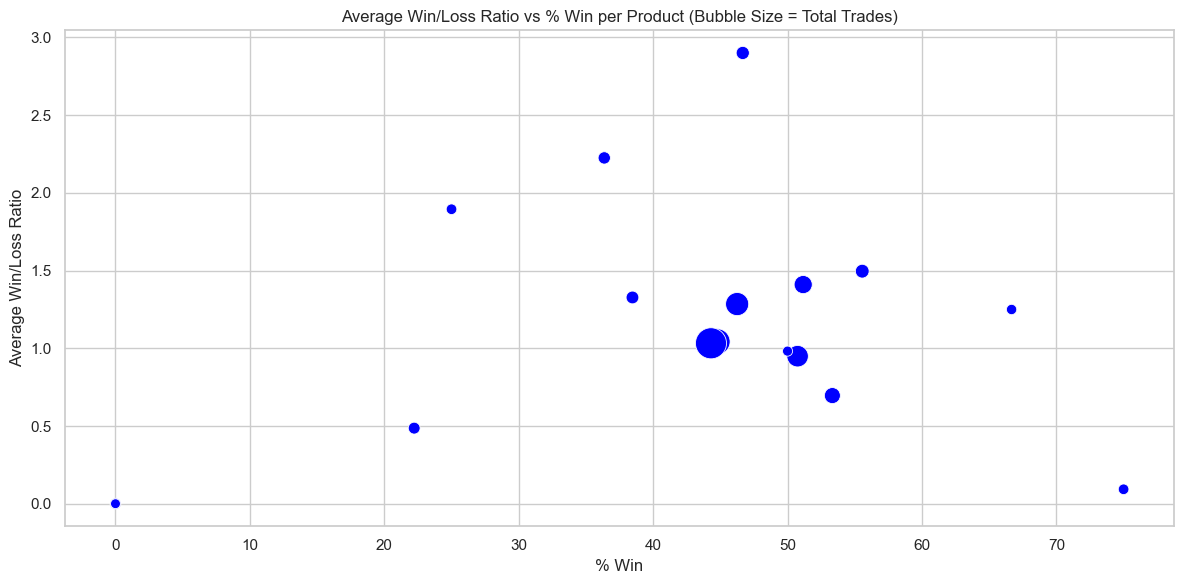

In [31]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='% Win', y='Average Win/Loss Ratio', size='Total Trades', sizes=(50, 500), data=summary_df, color='blue', legend=False)
plt.title('Average Win/Loss Ratio vs % Win per Product (Bubble Size = Total Trades)')
plt.xlabel('% Win')
plt.ylabel('Average Win/Loss Ratio')
plt.grid(True)
plt.tight_layout()
plt.show()


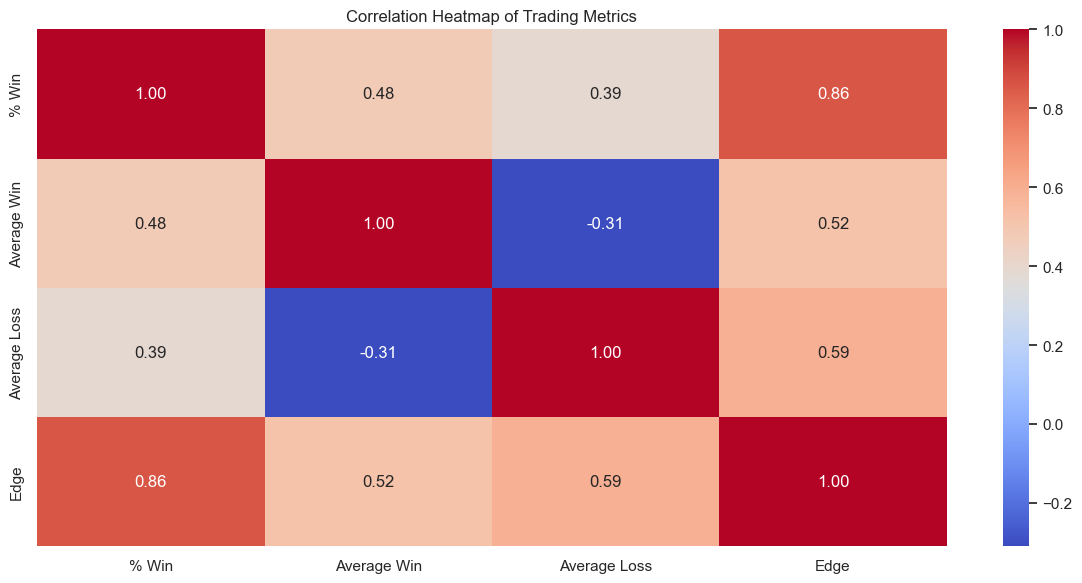

In [32]:
# Assuming you want to visualize the correlation between average win/loss and win rate
heatmap_data = summary_df[['Product', '% Win', 'Average Win', 'Average Loss', 'Edge']]
heatmap_data.set_index('Product', inplace=True)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Trading Metrics')
plt.tight_layout()
plt.show()

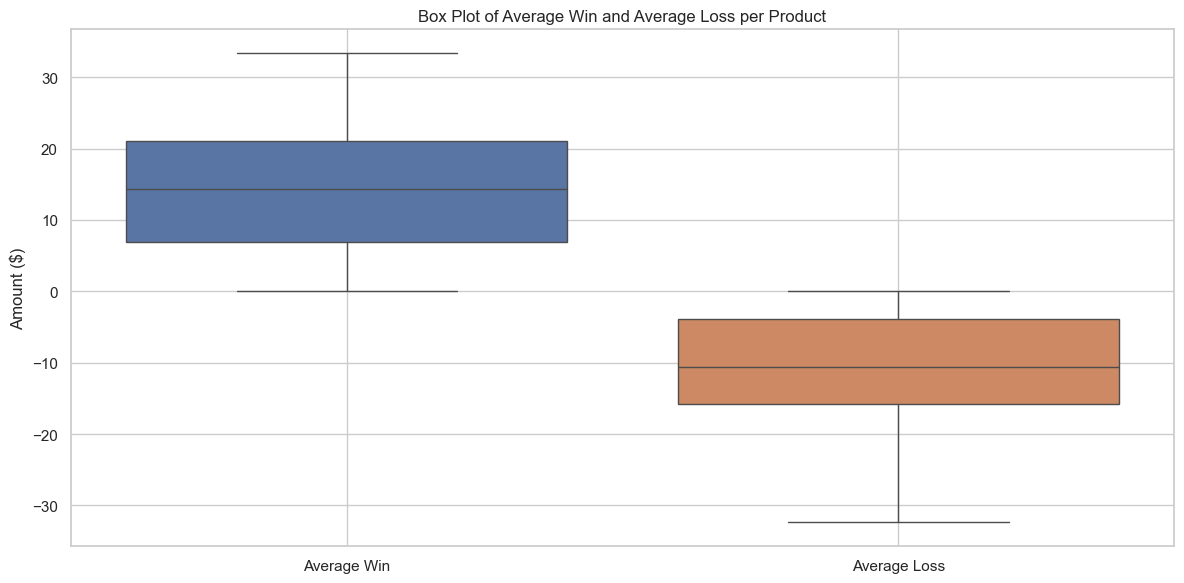

In [33]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=summary_df[['Average Win', 'Average Loss']])
plt.title('Box Plot of Average Win and Average Loss per Product')
plt.ylabel('Amount ($)')
plt.xticks([0, 1], ['Average Win', 'Average Loss'])
plt.grid(True)
plt.tight_layout()
plt.show()


In [34]:
import pandas as pd

# Load your trading data
# trades = pd.read_csv('refined_history.csv')

# Ensure 'DATE/TIME' is in datetime format
trades['DATE/TIME'] = pd.to_datetime(trades['DATE/TIME'])

# Extract the date from the 'DATE/TIME' column
trades['Date'] = trades['DATE/TIME'].dt.date

# Prepare a results DataFrame
daily_summary = []

# Group data by Date
daily_groups = trades.groupby('Date')

for date, daily_data in daily_groups:
    total_trades = len(daily_data)
    
    # Calculate wins and losses
    wins = daily_data[daily_data['PL'] > 0]
    losses = daily_data[daily_data['PL'] <= 0]

    win_count = len(wins)
    loss_count = len(losses)

    average_win = wins['PL'].mean() if not wins.empty else 0
    average_loss = losses['PL'].mean() if not losses.empty else 0

    win_rate = (win_count / total_trades) * 100 if total_trades > 0 else 0
    loss_rate = (loss_count / total_trades) * 100 if total_trades > 0 else 0

    edge = (win_count / total_trades * average_win) + (loss_count / total_trades * average_loss) if total_trades > 0 else 0

    total_stakes = daily_data['STAKE'].sum()  # Assuming 'STAKE' is a column in your DataFrame
    average_stake = daily_data['STAKE'].mean() if total_trades > 0 else 0

    # Find the product with the most stakes
    most_stakes_product = daily_data.groupby('PRODUCT')['STAKE'].sum().idxmax()

    # Find the biggest winning product
    biggest_winning_product = wins.groupby('PRODUCT')['PL'].sum().idxmax() if not wins.empty else None

    # Find the biggest losing product
    biggest_losing_product = losses.groupby('PRODUCT')['PL'].sum().idxmin() if not losses.empty else None

    # Append results to the summary DataFrame
    daily_summary.append({
        'Date': date,
        'Total Trades': total_trades,
        'Wins': win_count,
        'Average Win': average_win,
        'Losses': loss_count,
        'Average Loss': average_loss,
        '% Win': win_rate,
        '% Loss': loss_rate,
        'Edge': edge,
        'Total Stakes': total_stakes,
        'Average Stake': average_stake,
        'Most Stakes Product': most_stakes_product,
        'Biggest Winning Product': biggest_winning_product,
        'Biggest Losing Product': biggest_losing_product,
    })

# Create a DataFrame from the daily summary
daily_summary_df = pd.DataFrame(daily_summary)

# Display the results
print(daily_summary_df)


          Date  Total Trades  Wins  Average Win  Losses  Average Loss  \
0   2024-11-15             3     1    49.650000       2    -44.850000   
1   2024-11-18             2     2    45.880000       0      0.000000   
2   2024-11-19             3     2    26.145000       1     -0.390000   
3   2024-11-20            64    33    14.861515      31    -12.732903   
4   2024-11-21             6     2    26.625000       4    -37.680000   
5   2024-11-22             3     2     6.360000       1    -49.650000   
6   2024-11-24             2     1    16.930000       1    -96.600000   
7   2024-11-25            29    17    14.355882      12     -9.685833   
8   2024-11-26            86    42    34.771190      44    -28.677273   
9   2024-11-27             8     5    23.514000       3    -17.413333   
10  2024-11-28             1     1     0.320000       0      0.000000   
11  2024-11-29             7     2    11.750000       5    -27.882000   
12  2024-12-02            36    10    44.279000    

In [35]:
# import pandas as pd

# # Load your trading data
# # trades = pd.read_csv('refined_history.csv')

# # Ensure 'DATE/TIME' is in datetime format
# trades['DATE/TIME'] = pd.to_datetime(trades['DATE/TIME'])

# # Extract the date from the 'DATE/TIME' column
# trades['Date'] = trades['DATE/TIME'].dt.date

# # Prepare a results DataFrame
# daily_summary = []

# # Group data by Date
# daily_groups = trades.groupby('Date')

# for date, daily_data in daily_groups:
#     total_trades = len(daily_data)
    
#     # Calculate wins and losses
#     wins = daily_data[daily_data['PL'] > 0]
#     losses = daily_data[daily_data['PL'] <= 0]

#     win_count = len(wins)
#     loss_count = len(losses)

#     average_win = wins['PL'].mean() if not wins.empty else 0
#     average_loss = losses['PL'].mean() if not losses.empty else 0

#     win_rate = (win_count / total_trades) * 100 if total_trades > 0 else 0
#     loss_rate = (loss_count / total_trades) * 100 if total_trades > 0 else 0

#     edge = (win_count / total_trades * average_win) + (loss_count / total_trades * average_loss) if total_trades > 0 else 0

#     total_stakes = daily_data['STAKE'].sum()  # Assuming 'STAKE' is a column in your DataFrame
#     average_stake = daily_data['STAKE'].mean() if total_trades > 0 else 0

#     # Find the product with the most stakes
#     most_stakes_product = daily_data.groupby('PRODUCT')['STAKE'].sum().idxmax()

#     # Find the biggest winning product
#     biggest_winning_product = wins.groupby('PRODUCT')['PL'].sum().idxmax() if not wins.empty else None

#     # Find the biggest losing product
#     biggest_losing_product = losses.groupby('PRODUCT')['PL'].sum().idxmin() if not losses.empty else None

#     # Append results to the summary DataFrame
#     daily_summary.append({
#         'Date': date,
#         'Total Trades': total_trades,
#         'Wins': win_count,
#         'Average Win': average_win,
#         'Losses': loss_count,
#         'Average Loss': average_loss,
#         '% Win': win_rate,
#         '% Loss': loss_rate,
#         'Edge': edge,
#         'Total Stakes': total_stakes,
#         'Average Stake': average_stake,
#         'Most Stakes Product': most_stakes_product,
#         'Biggest Winning Product': biggest_winning_product,
#         'Biggest Losing Product': biggest_losing_product,
#     })

# # Create a DataFrame from the daily summary
# daily_summary_df = pd.DataFrame(daily_summary)

# # Specify the path to your refined_history file
# refined_history_path = 'refined_history.xlsx'  # Update with the actual path if necessary

# # Create an Excel writer object (this will create a new file if it doesn't exist)
# with pd.ExcelWriter(refined_history_path, engine='openpyxl', mode='a') as writer:
#     # Write the daily_summary_df to a new sheet named 'daily_summary'
#     daily_summary_df.to_excel(writer, sheet_name='daily_summary', index=False)

# print("Daily summary data saved to 'refined_history.xlsx' in the 'daily_summary' sheet.")


In [36]:
import pandas as pd

# Load your trading data
# trades = pd.read_csv('refined_history.csv')

# Ensure 'DATE/TIME' is in datetime format
trades['DATE/TIME'] = pd.to_datetime(trades['DATE/TIME'])

# Extract the date from the 'DATE/TIME' column
trades['Date'] = trades['DATE/TIME'].dt.date

# Prepare a results DataFrame
daily_summary = []

# Calculate overall total trades for percentage calculation
overall_total_trades = len(trades)

# Group data by Date
daily_groups = trades.groupby('Date')

for date, daily_data in daily_groups:
    total_trades = len(daily_data)
    
    # Calculate wins and losses
    wins = daily_data[daily_data['PL'] > 0]
    losses = daily_data[daily_data['PL'] <= 0]

    win_count = len(wins)
    loss_count = len(losses)

    average_win = wins['PL'].mean() if not wins.empty else 0
    average_loss = losses['PL'].mean() if not losses.empty else 0

    win_rate = (win_count / total_trades) * 100 if total_trades > 0 else 0
    loss_rate = (loss_count / total_trades) * 100 if total_trades > 0 else 0

    edge = (win_count / total_trades * average_win) + (loss_count / total_trades * average_loss) if total_trades > 0 else 0

    # Calculate Risk-Reward Ratio (RRR)
    rrr = average_win / abs(average_loss) if average_loss != 0 else None

    total_stakes = daily_data['STAKE'].sum()  # Assuming 'STAKE' is a column in your DataFrame
    average_stake = daily_data['STAKE'].mean() if total_trades > 0 else 0

    # Find the product with the most stakes
    most_stakes_product = daily_data.groupby('PRODUCT')['STAKE'].sum().idxmax()

    # Find the biggest winning product
    biggest_winning_product = wins.groupby('PRODUCT')['PL'].sum().idxmax() if not wins.empty else None

    # Find the biggest losing product
    biggest_losing_product = losses.groupby('PRODUCT')['PL'].sum().idxmin() if not losses.empty else None

    # Calculate percentage of trades for the day compared to overall total trades
    percentage_of_total_trades = (total_trades / overall_total_trades) * 100 if overall_total_trades > 0 else 0

    # Append results to the summary DataFrame
    daily_summary.append({
        'Date': date,
        'Total Trades': total_trades,
        '% of Total Trades': percentage_of_total_trades,  # New column for percentage of total trades
        'Wins': win_count,
        'Average Win': average_win,
        'Losses': loss_count,
        'Average Loss': average_loss,
        '% Win': win_rate,
        '% Loss': loss_rate,
        'Edge': edge,
        'RRR': rrr,  # Risk-Reward Ratio
        'Total Stakes': total_stakes,
        'Average Stake': average_stake,
        'Most Stakes Product': most_stakes_product,
        'Biggest Winning Product': biggest_winning_product,
        'Biggest Losing Product': biggest_losing_product,
    })

# Create a DataFrame from the daily summary
daily_summary_df = pd.DataFrame(daily_summary)

# Specify the path to your refined_history file
refined_history_path = 'refined_history.xlsx'  # Update with the actual path if necessary

# Create an Excel writer object (this will create a new file if it doesn't exist)
with pd.ExcelWriter(refined_history_path, engine='openpyxl', mode='a') as writer:
    # Write the daily_summary_df to a new sheet named 'daily_summary'
    daily_summary_df.to_excel(writer, sheet_name='daily_summary', index=False)

print("Daily summary data saved to 'refined_history.xlsx' in the 'daily_summary' sheet.")


Daily summary data saved to 'refined_history.xlsx' in the 'daily_summary' sheet.


In [37]:
summary_df['Average Win/Loss Ratio'] = summary_df['Average Win'] / abs(summary_df['Average Loss'])

In [40]:
risk_management_issues = daily_summary_df[daily_summary_df['Edge'] < 0]
print("Days with negative edge (potential risk management issues):")
print(risk_management_issues[['Date', 'Edge', 'Average Loss']])



Days with negative edge (potential risk management issues):
          Date       Edge  Average Loss
0   2024-11-15 -13.350000    -44.850000
4   2024-11-21 -16.245000    -37.680000
5   2024-11-22 -12.310000    -49.650000
6   2024-11-24 -39.835000    -96.600000
11  2024-11-29 -16.558571    -27.882000
12  2024-12-02 -11.117500    -32.423846
14  2024-12-04  -0.238710     -3.778824
15  2024-12-05 -74.970556   -119.241667
18  2024-12-10  -0.706348    -13.730000


In [42]:
# First, ensure to import necessary libraries
import pandas as pd

# Your previous code to create daily_summary_df goes here

# Calculate mean and percentiles for key metrics
mean_values = daily_summary_df[['Total Trades', 'Wins', 'Average Win', 'Losses', 'Average Loss']].mean()
percentiles = daily_summary_df[['Average Win', 'Average Loss']].quantile([0.25, 0.5, 0.75])

print("Mean Values:")
print(mean_values)
print("\nPercentiles:")
print(percentiles)

# Calculate correlation matrix excluding non-numeric columns
correlation_matrix = daily_summary_df.select_dtypes(include='number').corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)



Mean Values:
Total Trades    30.210526
Wins            13.947368
Average Win     28.008461
Losses          16.263158
Average Loss   -32.412262
dtype: float64

Percentiles:
      Average Win  Average Loss
0.25    13.963775    -41.265000
0.50    23.514000    -27.882000
0.75    39.000595    -11.093443

Correlation Matrix:
                   Total Trades  % of Total Trades      Wins  Average Win  \
Total Trades           1.000000           1.000000  0.989899    -0.147504   
% of Total Trades      1.000000           1.000000  0.989899    -0.147504   
Wins                   0.989899           0.989899  1.000000    -0.158973   
Average Win           -0.147504          -0.147504 -0.158973     1.000000   
Losses                 0.992952           0.992952  0.966119    -0.135631   
Average Loss           0.289338           0.289338  0.323888    -0.215715   
% Win                 -0.282181          -0.282181 -0.211945    -0.125869   
% Loss                 0.282181           0.282181  0.211945   

Mean Values:
Total Trades    30.210526
Wins            13.947368
Average Win     28.008461
Losses          16.263158
Average Loss   -32.412262
dtype: float64

Percentiles:
      Average Win  Average Loss
0.25    13.963775    -41.265000
0.50    23.514000    -27.882000
0.75    39.000595    -11.093443

Correlation Matrix:
                   Total Trades  % of Total Trades      Wins  Average Win  \
Total Trades           1.000000           1.000000  0.989899    -0.147504   
% of Total Trades      1.000000           1.000000  0.989899    -0.147504   
Wins                   0.989899           0.989899  1.000000    -0.158973   
Average Win           -0.147504          -0.147504 -0.158973     1.000000   
Losses                 0.992952           0.992952  0.966119    -0.135631   
Average Loss           0.289338           0.289338  0.323888    -0.215715   
% Win                 -0.282181          -0.282181 -0.211945    -0.125869   
% Loss                 0.282181           0.282181  0.211945   

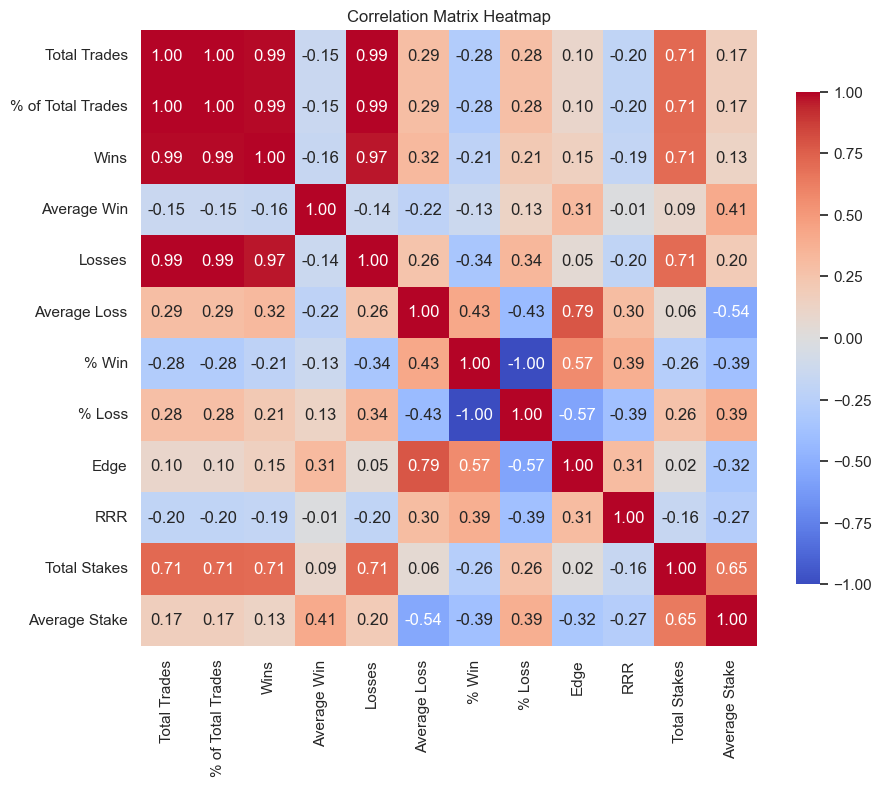

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Your previous code to create daily_summary_df goes here

# Calculate mean and percentiles for key metrics
mean_values = daily_summary_df[['Total Trades', 'Wins', 'Average Win', 'Losses', 'Average Loss']].mean()
percentiles = daily_summary_df[['Average Win', 'Average Loss']].quantile([0.25, 0.5, 0.75])

print("Mean Values:")
print(mean_values)
print("\nPercentiles:")
print(percentiles)

# Calculate correlation matrix excluding non-numeric columns
correlation_matrix = daily_summary_df.select_dtypes(include='number').corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))  # Adjust the size as needed
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix Heatmap')
plt.show()
